In [1]:
import numpy as np
import pandas as pd

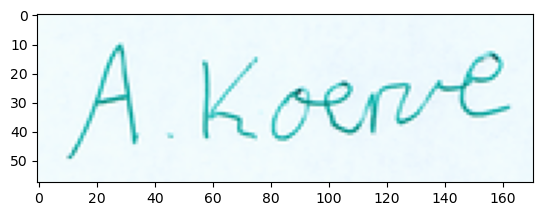

In [6]:
import matplotlib.pyplot as plt
img=plt.imread('D:/FirstUniv/DataSet/NFI-00101014.png')

plt.imshow(img)

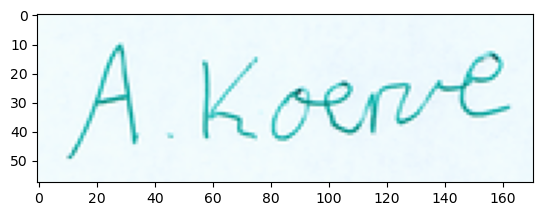

In [7]:
img1=plt.imread('D:/FirstUniv/DataSet/NFI-00101014.png')

plt.imshow(img1)

In [9]:
!pip install cv2


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [8]:
import glob
gen=[glob.glob(" Path of real signature")]
forg= [glob.glob(" Path of fake signature")]
import keras
import cv2

ModuleNotFoundError: No module named 'cv2'

In [ ]:
train_data=[]
test_data=[]

train_labels[]
test_labels[]
 for data in range(len(gen)):
        for i in gen[data]:
            if data ==3:
                image=cv2.imread(i)
                image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image=cv2.resize(image, (224,224))
                test_data.append(image)
                test_labels.append(0)
            else:
                image=cv2.imread(i)
                image-cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image=cv2.resize(image, (224,224))
                train_data.append(image)
                train_labels.append(0)

for data in range(len(forg)):
        for i in forg[data]:
            if data ==3:
                image=cv2.imread(i)
                image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image=cv2.resize(image, (224,224))
                test_data.append(image)
                test_labels.append(1)
            else:
                image=cv2.imread(i)
                image-cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image=cv2.resize(image, (224,224))
                train_data.append(image)
                train_labels.append(1)

train_data=np.array(train_data)/255.0
train_labels =np.array(train_labels)

test_data=np.array(test_data)/255.0
test_labels =np.array(test_labels)

In [ ]:
train_data.shape

In [ ]:
from sklearn.utils import shuffle
train_data, train_labels-shuffle(train_data, train_labels)

test_data, test_labels=shuffle(test_data, test_labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam

nw=Sequential()

nw.adda(Conv2D (64,(3,3), input_shape=(224,224,3),activation='relu'))
nw.add(MaxPooling2D(3,3))
nw.adda(Conv2D (32,(3,3),activation='relu'))
nw.add(MaxPooling2D(2,2))

nw.add(Flatten())
nw.add(Dense(128, activation='relu'))
nw.add(Dropout(rate=0.3))

nw.add(Dense(2, activation='softmax'))

nw.compile(optimizer=Adam(lr=0.001), loss="BCE", metrics=["accuracy"])
nw.summary()


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 5
BS = 1
progess = nw.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

In [ ]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [ ]:
pred = nw.predict(test_data)
pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)